# Linear Regression on Hardware Data
This notebook demonstrates how to generate synthetic hardware data and apply linear regression to predict power consumption based on CPU usage.

In [16]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score



In [17]:
data = pd.read_csv('hardware.csv')

In [18]:
data

,Unnamed: 0,CPU_Usage,Power_Consumption
0,0,37.454012,125.343259
1,1,95.071431,238.647825
2,2,73.199394,196.857592
3,3,59.865848,159.793852
4,4,15.601864,80.105369
...,...,...,...
95,95,49.379560,144.680068
96,96,52.273283,154.161057
97,97,42.754102,137.213964
98,98,2.541913,56.467279


## Split the Data
We will split the data into training and testing sets.

In [19]:

# Split the data into training and testing sets
X = data[['CPU_Usage']]
y = data['Power_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 1), (20, 1), (80,), (20,))

## Train the Linear Regression Model
We will create and train a linear regression model using the training data.

In [20]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')


Intercept: 50.71456659729287
Coefficient: 1.9799323657480272


## Make Predictions
We will use the trained model to make predictions on the test data.

In [21]:

# Make predictions
y_pred = model.predict(X_test)

# Display the first few predictions
y_pred[:5]


array([ 63.29869008, 227.88432988, 203.6138079 , 181.88949798,
       101.95125272])

## Plot the Results
We will plot the actual vs predicted power consumption values.

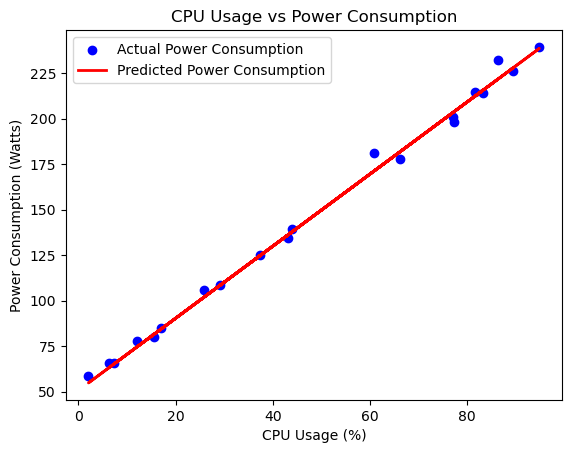

In [22]:

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual Power Consumption')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Power Consumption')
plt.xlabel('CPU Usage (%)')
plt.ylabel('Power Consumption (Watts)')
plt.title('CPU Usage vs Power Consumption')
plt.legend()
plt.show()


## Evaluate the Model
We will evaluate the model using Mean Absolute Error (MAE) and R-squared (R²) score.

In [23]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2.95671288959488
R-squared: 0.9957338020477439
